In [1]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg.layers:  
    layer.trainable = False

In [10]:
# useful for getting number of classes
folders = glob('Datasets/Train/*')

In [11]:
len(folders)

2

In [12]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='sigmoid')(x)

In [13]:
# create a model object
model = Model(inputs = vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data = test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps= len(test_set)
)

Epoch 1/20
7/7 [==============================] - 31s 5s/step - loss: 0.3435 - accuracy: 0.9000 - val_loss: 0.4023 - val_accuracy: 0.7300
Epoch 2/20
7/7 [==============================] - 31s 5s/step - loss: 0.0666 - accuracy: 0.9850 - val_loss: 0.5529 - val_accuracy: 0.6050
Epoch 3/20
7/7 [==============================] - 30s 5s/step - loss: 0.0310 - accuracy: 0.9850 - val_loss: 0.2655 - val_accuracy: 0.9100
Epoch 4/20
7/7 [==============================] - 30s 4s/step - loss: 0.0250 - accuracy: 0.9950 - val_loss: 0.4854 - val_accuracy: 0.6050
Epoch 5/20
7/7 [==============================] - 30s 4s/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.5200 - val_accuracy: 0.5900
Epoch 6/20
7/7 [==============================] - 30s 4s/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.2824 - val_accuracy: 0.9250
Epoch 7/20
7/7 [==============================] - 29s 4s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.1284 - val_accuracy: 0.9950
Epoch 8/20
7/7 [==================

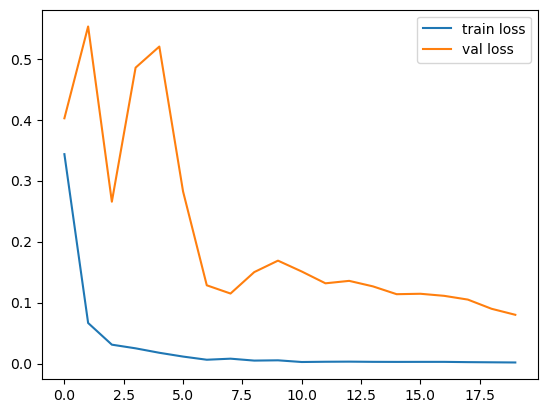

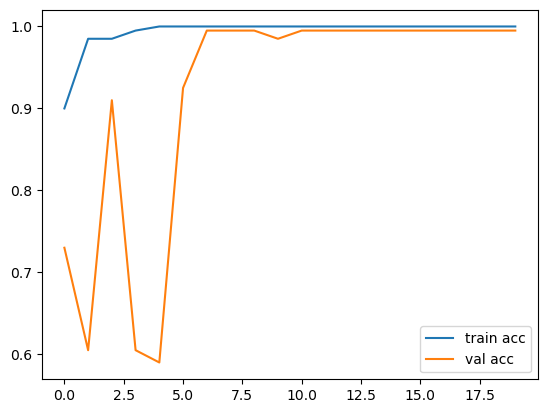

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg16.h5')